# [Bank Marketing Dataset](https://www.kaggle.com/datasets/hariharanpavan/bank-marketing-dataset-analysis-classification) 

This dataset describes direct marketing (phone) campaigns of a Portuguese bank. Each record corresponds to a contact with a client and includes socio-demographic attributes, details about the contact (timing, duration, number of contacts), and past campaign-related features. The binary target y indicates whether the client subscribed to a term deposit.

## Data description
| Variable | Definition |
| :------- | :----------|
| Age | Age of customer |
| Job | Job of customer |
| Marital | Marital status of customer |
| Education | Customer education level |
| Default | Has credit in default? |
| Housing | If customer has housing loan |
| Loan | Has personal loan |
| Balance | Customer's individual balance |
| Contact | Communication type |
| Month | Last contact month of year |
| Day | Last contact day of the week |
| Duration | Last contact duration, in seconds |
| Campaign | Number of contacts performed during this campaign and for this client |
| Pdays | Number of days that passed by after the client was last contacted from a previous campaign |
| Previous | Number of contacts performed before this campaign and for this client |
| Poutcome | Outcome of the previous marketing campaign |
| y | Has the client subscribed a term deposit |

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import certifi

os.environ.setdefault('SSL_CERT_FILE', certifi.where())

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

## Data exploration

1. Loading the dataset

In [3]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1n-g9zXZaHzXRX8FMoBFASWIhiXBTkGll", delimiter=",")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


2. Check the datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


3. Check if there are any null values

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

4. Check the distribution of the numerical values

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


We can see that in terms of the numericals we are working with clean dataset.

5. Check the other types

Number of jobs: 12 - ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


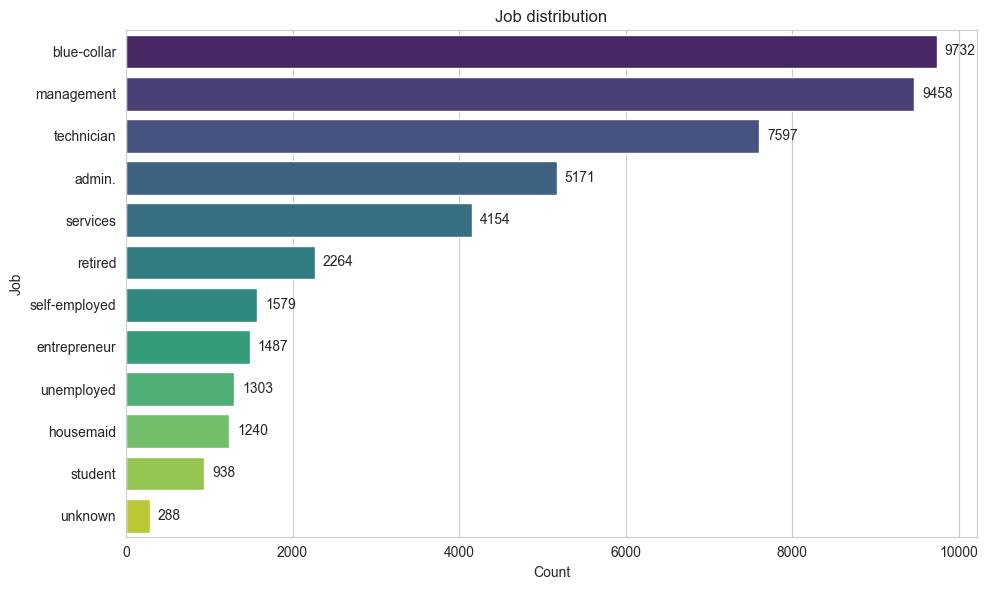

In [19]:
jobs = df['job'].unique()
print(f'Number of jobs: {len(jobs)} - {jobs}')

jobs_values = df['job'].value_counts()

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = sns.barplot(x=jobs_values.values, y=jobs_values.index, palette="viridis", hue=jobs_values.index, dodge=False)
ax.set_title("Job distribution")
ax.set_xlabel("Count")
ax.set_ylabel("Job")
for i, v in enumerate(jobs_values.values):
    ax.text(v + jobs_values.values.max()*0.01, i, f"{v}", va='center')
plt.tight_layout()
plt.show()

We have about 12 types of jobs. There is also type of unknown so some client didnt provide information about their job. About 288 client didnt provide information about their job and the most common one is blue-collar, management and technician

Number of marital statuses: 3 - ['married' 'single' 'divorced']


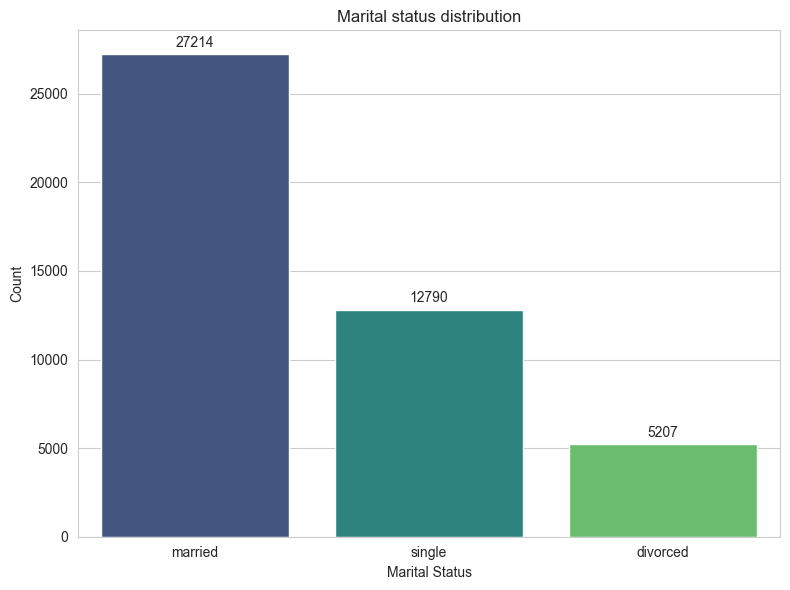

In [20]:
marital = df['marital'].unique()
print(f'Number of marital statuses: {len(marital)} - {marital}')

marital_values = df['marital'].value_counts()

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.barplot(x=marital_values.index, y=marital_values.values, palette="viridis", hue=marital_values.index, dodge=False)
ax.set_title("Marital status distribution")
ax.set_xlabel("Marital Status")
ax.set_ylabel("Count")

# annotate counts above bars
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height() + marital_values.values.max() * 0.01),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

Most clients are married, with singles about half as common and divorced customers the smallest group.

Number of education categories: 4 - ['tertiary' 'secondary' 'unknown' 'primary']


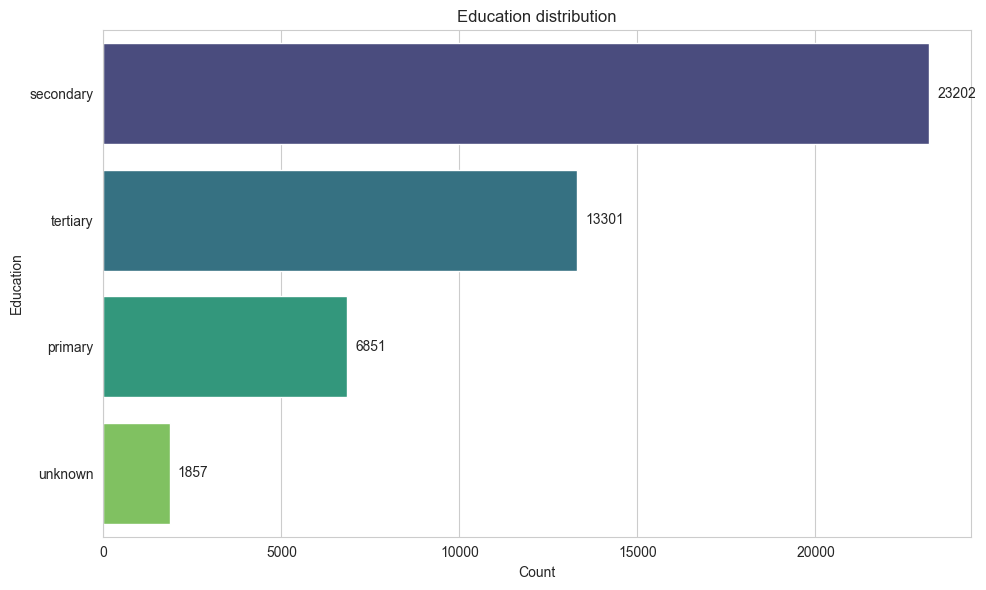

In [31]:
education = df['education'].unique()
print(f'Number of education categories: {len(education)} - {education}')

education_values = df['education'].value_counts()

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = sns.barplot(x=education_values.values, y=education_values.index, palette="viridis", hue=education_values.index, legend=False, dodge=False)
ax.set_title("Education distribution")
ax.set_xlabel("Count")
ax.set_ylabel("Education")

# annotate counts to the right of the bars
for i, v in enumerate(education_values.values):
    ax.text(v + education_values.values.max() * 0.01, i, f"{v}", va='center')

plt.tight_layout()
plt.show()

Secondary school graduates dominate the client base, tertiary education forms a sizable second tier, while primary schooling and unknown education make up a much smaller share.

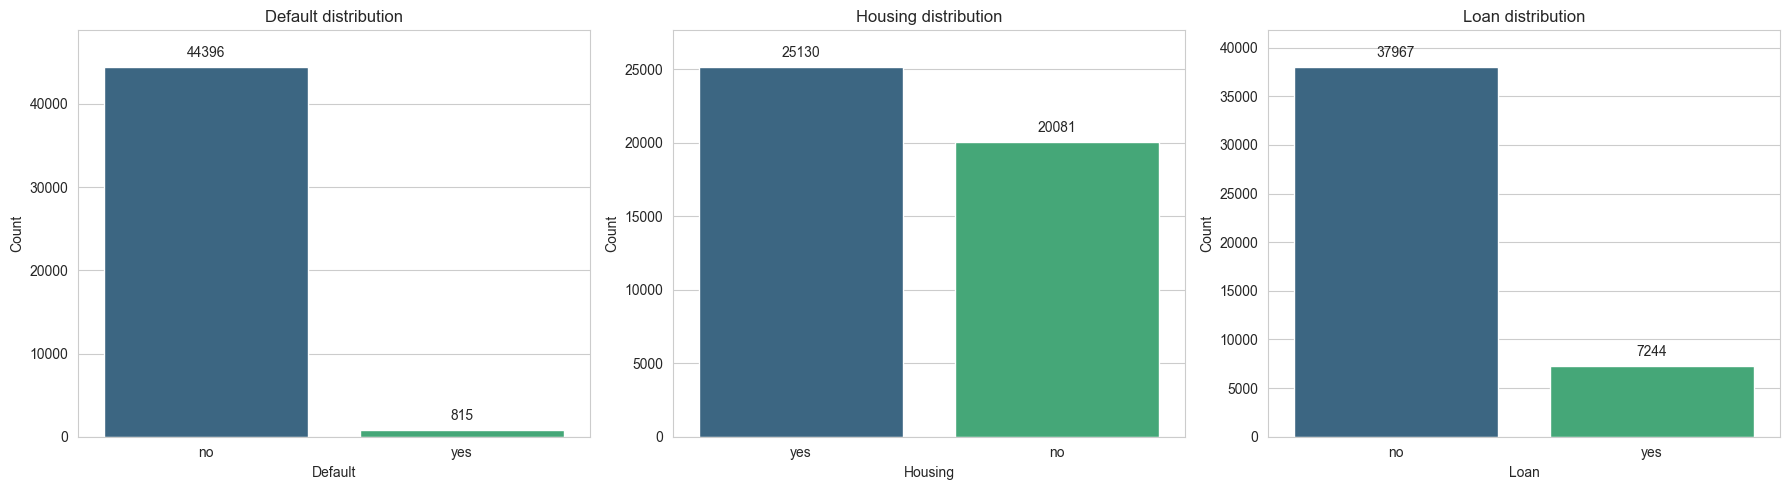

In [40]:
cols = ['default', 'housing', 'loan']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.set_style("whitegrid")

for ax, col in zip(axes, cols):
    vals = df[col].value_counts()
    sns.barplot(x=vals.index, y=vals.values, palette="viridis", ax=ax, hue= vals.index)
    ax.set_title(f"{col.capitalize()} distribution")
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Count")
    ax.set_ylim(0, vals.values.max() * 1.1)
    # annotate counts above bars
    for p in ax.patches:
        ax.annotate(int(p.get_height()),
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


Defaults and personal loans are rare, while just over half of clients hold a housing loan.

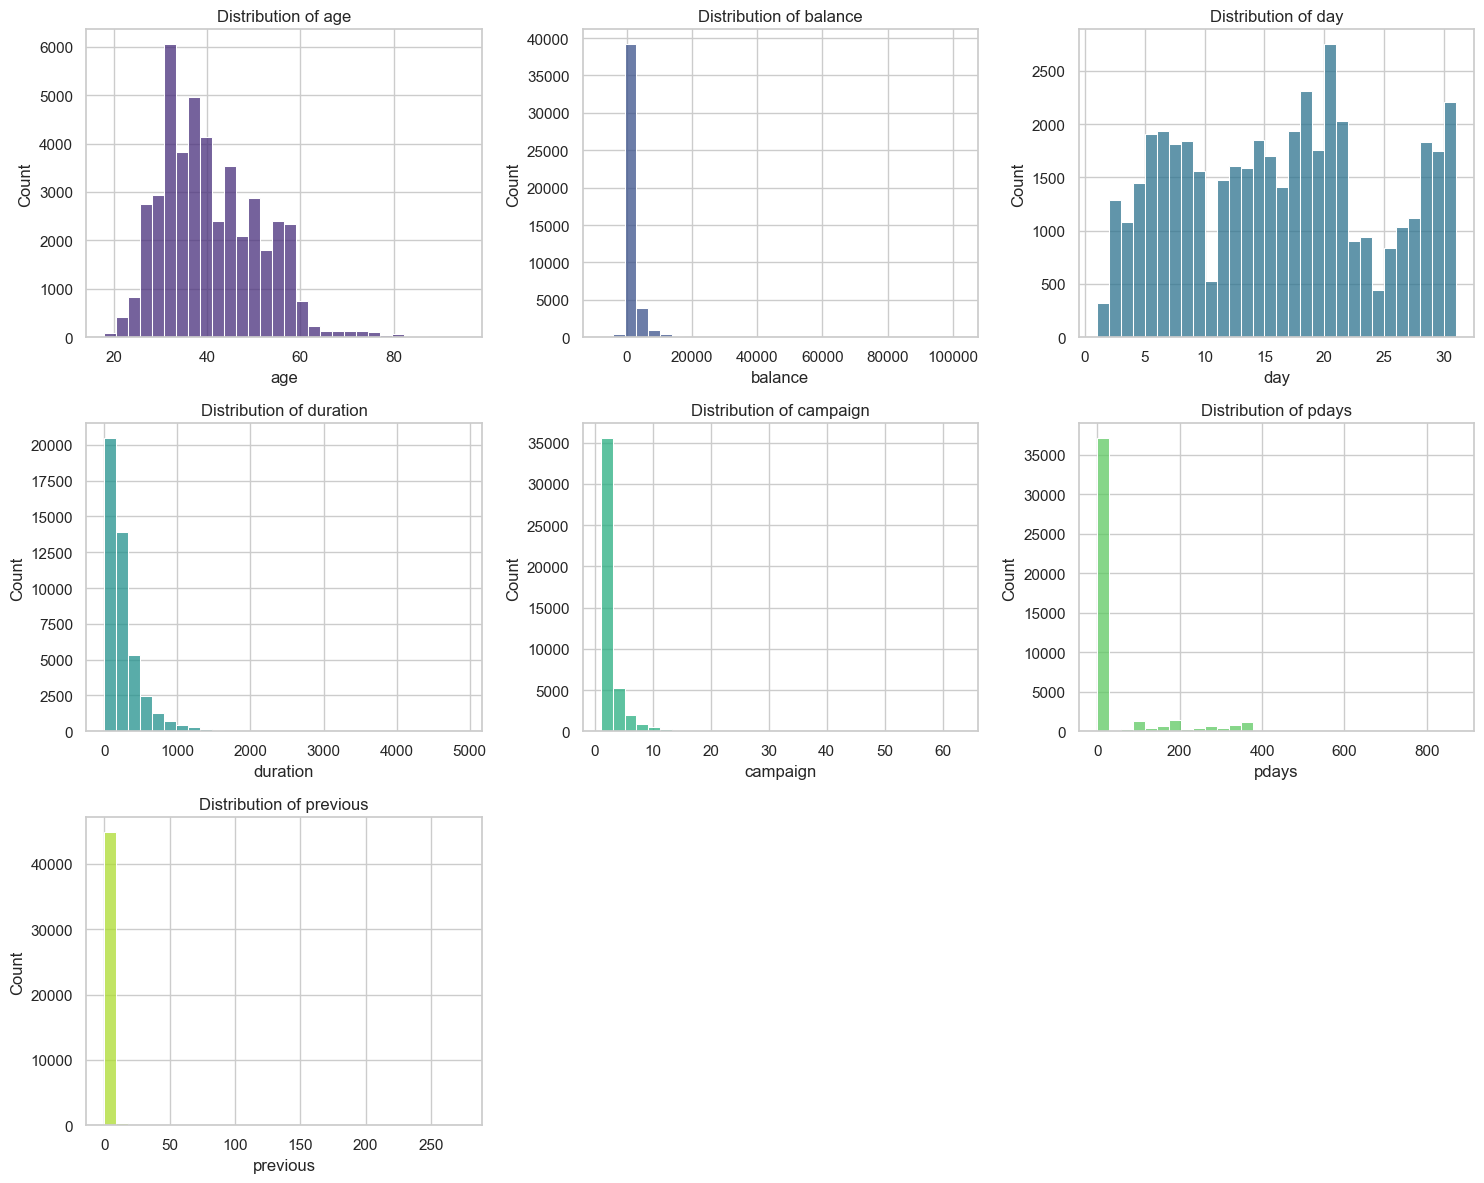

In [42]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

sns.set_theme(style="whitegrid")
n = len(numerical_cols)
cols = 3
rows = (n + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axs = axs.flatten()

palette = sns.color_palette("viridis", n)

for i, feature in enumerate(numerical_cols):
    ax = axs[i]
    sns.histplot(df[feature], bins=30, kde=False, ax=ax, color=palette[i])
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# hide any unused subplots
for j in range(n, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

- Ages concentrate between the early 30s and late 40s, showing a middle-aged customer base with few very young or senior clients.
- Account balances are heavily right-skewed: most customers hold modest balances, while a small minority have very large deposits.
- Contact days cover the full month without a single dominant day, suggesting scheduling is fairly evenly spread.
- Call durations, campaigns, pdays, and previous contacts all have long tails—most interactions are short, involve few follow-ups, and many customers were either never contacted before or not reached for a long time .

## Insights
Customer base skews toward blue-collar, management, and technician roles, with only a small unknown-job segment. Married clients make up roughly half of the contacts, singles about a third, and divorced customers a much smaller group. Most prospects hold at least secondary education, while primary schooling and missing education data are limited. Credit risk indicators are light: defaults and personal loans are uncommon, though a slight majority carry housing loans.

## Analyzing relationships between categorical and numerical columns
In this section i want to get deeply into relationships between categorical and numerical columns.

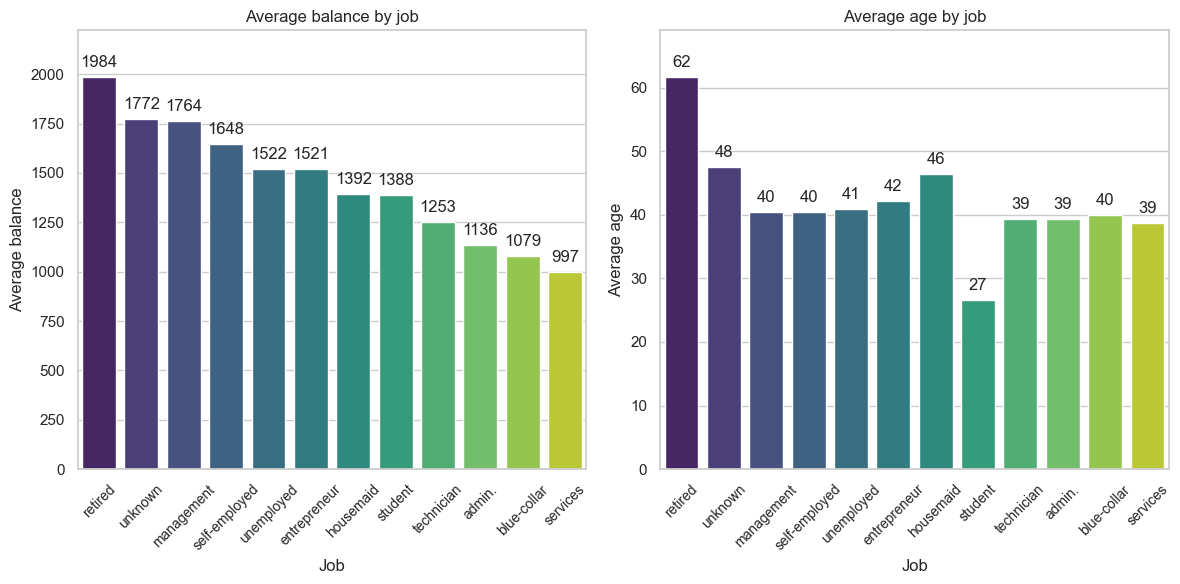

In [52]:
# vertical bar charts: average numeric values by job (cleaned: no redundant hue, formatted annotations)
num_candidates = ['balance', 'age']
num_cols = [c for c in num_candidates if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]

grp = df.groupby('job')[num_cols].mean().reset_index()
grp = grp.sort_values(by=num_cols[0], ascending=False).reset_index(drop=True)
order = grp['job'].tolist()

palette = sns.color_palette("viridis", len(order))

fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 6), sharey=False)
if len(num_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, num_cols):
    sns.barplot(
        data=grp,
        x='job',
        y=col,
        ax=ax,
        order=order,
        hue='job',
        hue_order=order,
        palette=palette,
        dodge=False,
        legend=False,
    )
    ax.set_title(f'Average {col} by job')
    ax.set_xlabel('Job')
    ax.set_ylabel(f'Average {col}')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.set_ylim(0, grp[col].max() * 1.12)

    # annotate bar values above each bar with sensible formatting
    for p in ax.patches:
        val = p.get_height()
        if pd.api.types.is_float_dtype(grp[col]):
            txt = f"{val:.0f}"
        else:
            txt = f"{val:.0f}"
        ax.annotate(
            txt,
            (p.get_x() + p.get_width() / 2, val),
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points',
        )

plt.tight_layout()
plt.show()

Retired clients hold the largest balances and are oldest on average. Unknown job category shows high balances and older age, suggesting missing job data might mask experienced clients. Students have the lowest balances and youngest ages. Blue-collar, services, and administrative roles cluster around moderate balances and late-30s averages. Differences between job segments are large enough to consider job when targeting offers.

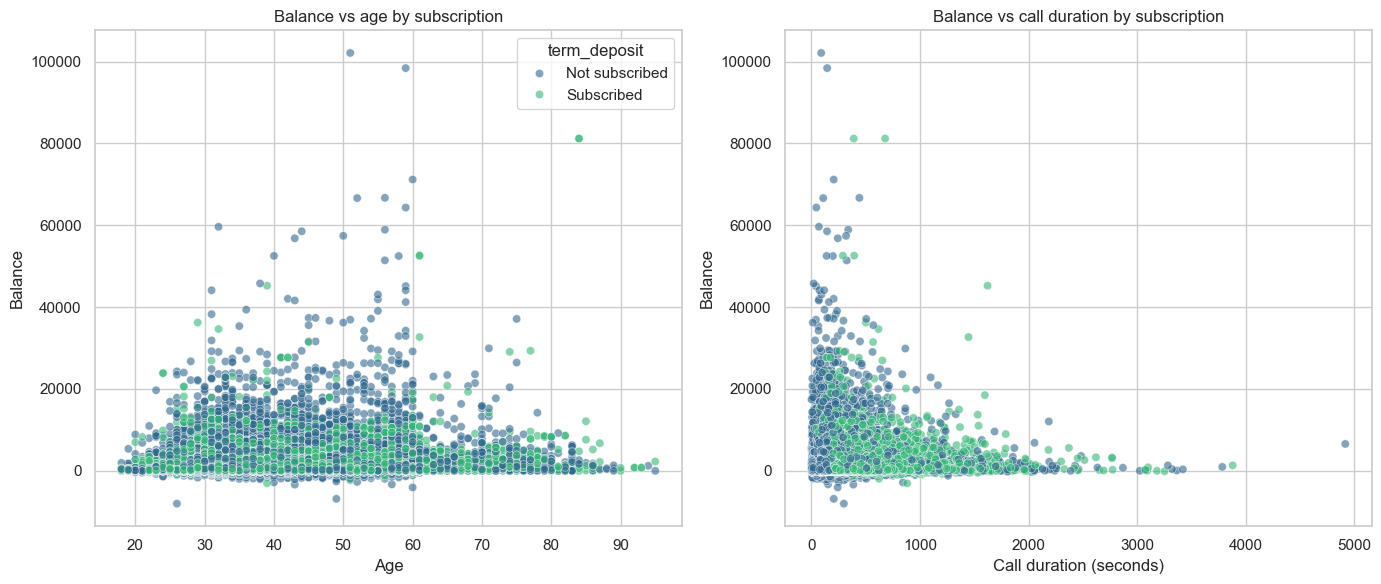

In [53]:
scatter_cols = ['balance', 'duration', 'age']
scatter_df = df[scatter_cols + ['y']].copy()
scatter_df['term_deposit'] = scatter_df['y'].map({'yes': 'Subscribed', 'no': 'Not subscribed'})

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

sns.scatterplot(data=scatter_df, x='age', y='balance', hue='term_deposit', palette='viridis', alpha=0.6, ax=axes[0])
axes[0].set_title('Balance vs age by subscription')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Balance')

sns.scatterplot(data=scatter_df, x='duration', y='balance', hue='term_deposit', palette='viridis', alpha=0.6, ax=axes[1], legend=False)
axes[1].set_title('Balance vs call duration by subscription')
axes[1].set_xlabel('Call duration (seconds)')
axes[1].set_ylabel('Balance')

plt.tight_layout()
plt.show()

Clients who subscribe tend to hold higher balances across ages.
Longer calls reach both subscriber groups, but high balances still lean toward subscribers.
Younger clients rarely pair low balances with subscriptions.